In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("electricity_cost_dataset.csv")

In [3]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [4]:
df.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['structure type'] = Encoder.fit_transform(df['structure type'])
df['structure type']

0       2
1       2
2       2
3       3
4       3
       ..
9995    0
9996    3
9997    0
9998    0
9999    0
Name: structure type, Length: 10000, dtype: int64

In [6]:
df.info()
x=df.drop(["electricity cost","issue reolution time", "air qality index"], axis = 1)
x
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  int64  
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


,site area,structure type,water consumption,recycling rate,utilisation rate,resident count
0,1360,2,2519.0,69,52,72
1,4272,2,2324.0,50,76,261
2,3592,2,2701.0,20,94,117
3,966,3,1000.0,13,60,35
4,4926,3,5990.0,23,65,185
...,...,...,...,...,...,...
9995,708,0,1365.0,76,77,0
9996,2960,3,3332.0,22,72,54
9997,3942,0,2427.0,61,43,0
9998,3211,0,4639.0,72,73,0


In [7]:
df = df.dropna(subset= ['structure type'])
df = df.dropna()
df = df.dropna(how = 'all') # removes completely empty column
df = df.dropna(axis = 1, thresh = 100) 

In [ ]:
df['air qality index'] = df['air qality index'].ffill(axis=0)
df['air qality index'] = df['air qality index'].fillna(method = 'bfill')
df['air qality index'] = df['air qality index'].fillna(0)
df['air qality index'] = df['air qality index'].fillna(df['air qality index'].mean())
df['air qality index'] = df['air qality index'].fillna(df['air qality index'].median())
df['air qality index'] = df['air qality index'].fillna(df['air qality index'].mode()[0])
df = df.fillna(df.mean())

In [ ]:
#conversion of hour into min and min into hour 
# Assigning and converting Duration column into list
duration = list(data["Duration"])
# print(len(duration))
 
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
         # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  
        # Adds 0 hour
 
duration_hours = []
duration_mins = []
for i in range(len(duration)):
 
    convt = int(duration[i].split(sep = "h")[0])  # Extract hours from duration
    min_cont = convt*60
    minute = int(duration[i].split(sep = "m")[0].split()[-1])  # Extracts only minutes from duration
    final_time = min_cont + minute
    final_time_hr  = final_time/60
    duration_hours.append(final_time)
    duration_mins.append(final_time_hr)
 
print(duration_hours)
print(duration_mins)

data["Duration_mins"] = data["Duration_mins"].round(2)

In [8]:
y = df["electricity cost"]
y

0       1420.0
1       3298.0
2       3115.0
3       1575.0
4       4301.0
         ...  
9995     885.0
9996    3081.0
9997    3325.0
9998    2892.0
9999    2603.0
Name: electricity cost, Length: 10000, dtype: float64

In [9]:
num = df.select_dtypes(include='number')
corr = num.corr()
print(corr)

                      site area  structure type  water consumption  \
site area              1.000000        0.008511           0.745372   
structure type         0.008511        1.000000           0.005895   
water consumption      0.745372        0.005895           1.000000   
recycling rate         0.006786       -0.019257           0.006977   
utilisation rate       0.019681        0.007324           0.008711   
air qality index      -0.003770        0.024615           0.000929   
issue reolution time   0.007520       -0.020165           0.007786   
resident count         0.360160        0.606539           0.281256   
electricity cost       0.874376        0.014393           0.698775   

                      recycling rate  utilisation rate  air qality index  \
site area                   0.006786          0.019681         -0.003770   
structure type             -0.019257          0.007324          0.024615   
water consumption           0.006977          0.008711          0.00092

<Axes: >

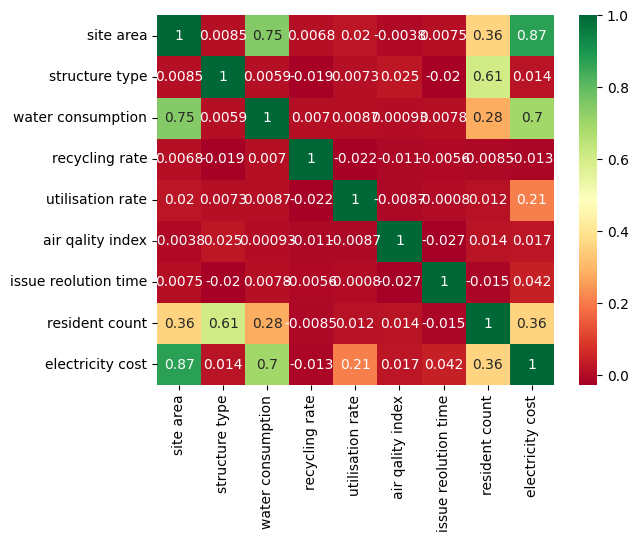

In [10]:
sns.heatmap(corr, cmap='RdYlGn', annot = True)

In [11]:
df['air qality index'].dtype

dtype('int64')

In [12]:
df.isnull().sum()

site area               0
structure type          0
water consumption       0
recycling rate          0
utilisation rate        0
air qality index        0
issue reolution time    0
resident count          0
electricity cost        0
dtype: int64

In [13]:
skew = num.skew()
print("skew",skew)

kurtosis = num.kurt()
print("kurtosis", kurtosis)

skew site area              -0.005722
structure type         -0.297906
water consumption       0.774431
recycling rate          0.022425
utilisation rate        0.004645
air qality index       -0.004155
issue reolution time    0.006188
resident count          1.313040
electricity cost        0.301033
dtype: float64
kurtosis site area              -1.202504
structure type         -1.580654
water consumption      -0.170075
recycling rate         -1.200475
utilisation rate       -1.193602
air qality index       -1.193428
issue reolution time   -1.174524
resident count          0.948397
electricity cost       -0.603106
dtype: float64


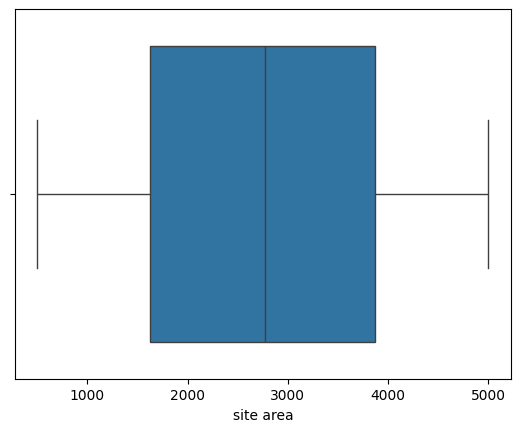

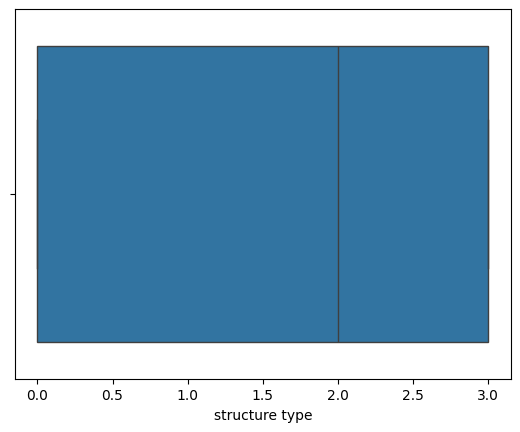

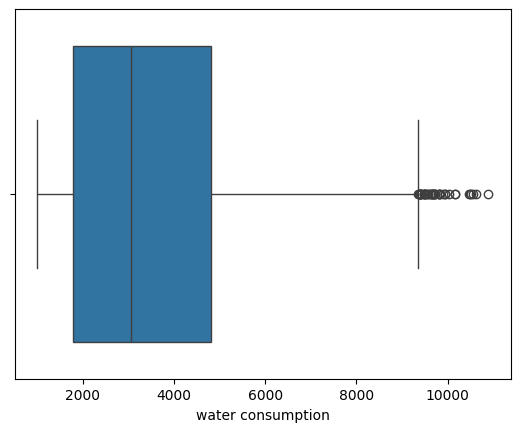

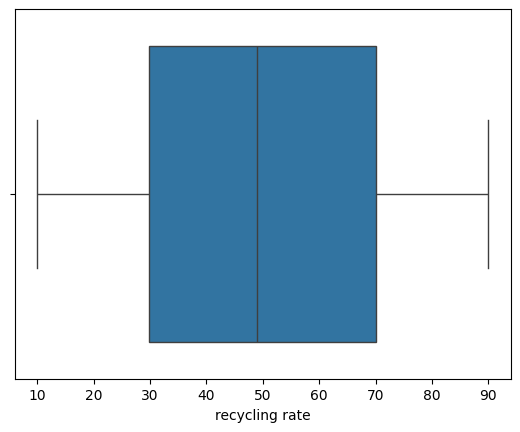

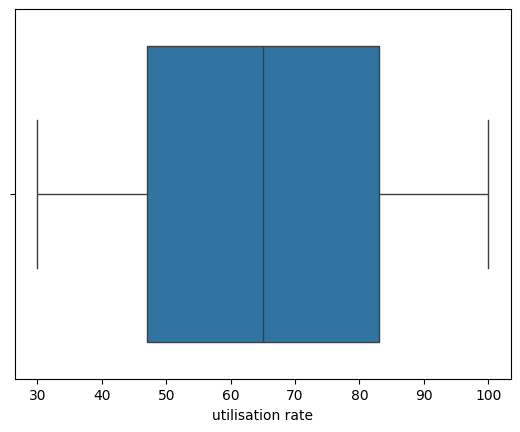

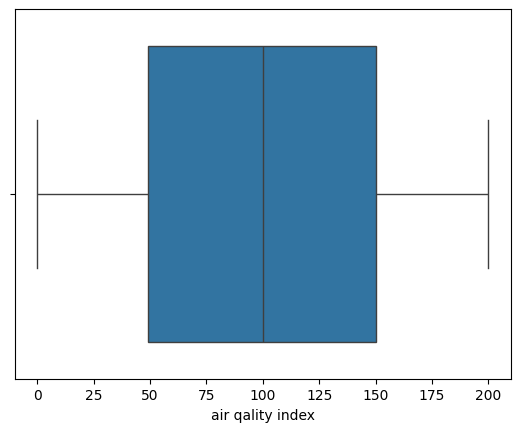

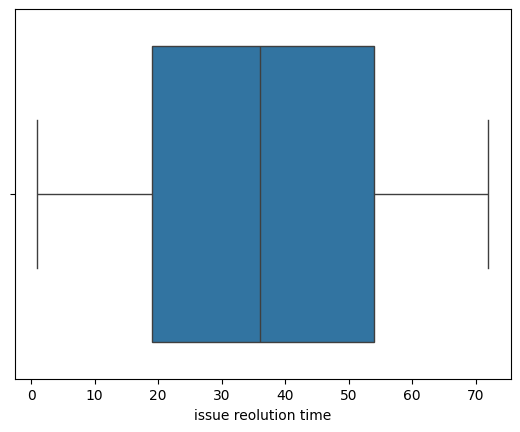

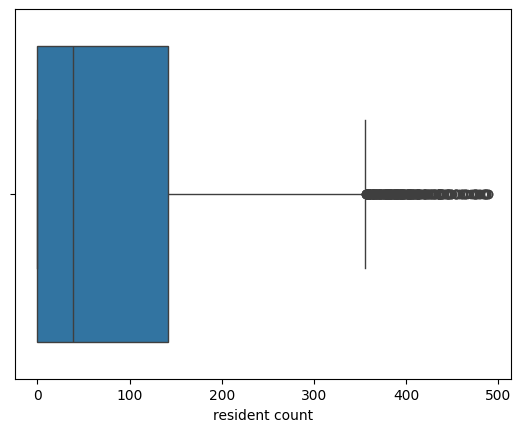

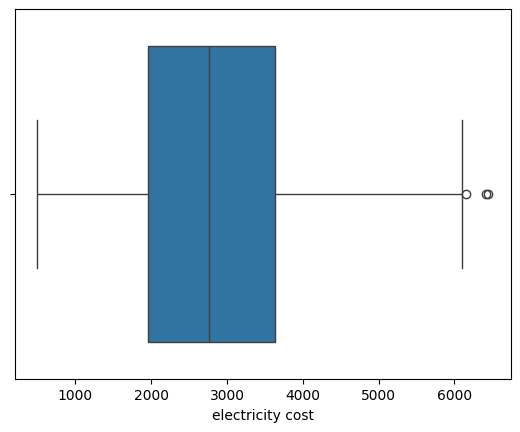

In [14]:
num = df.select_dtypes(include='number')
for column in num :
    plt.figure()
    sns.boxplot(x = df[column], data = df)

In [15]:
# from scipy.stats import zscore
# print('Before outlier removal : ',df.shape)
# z = np.abs(zscore(df, axis = 1))
# threshold = 3

# print(z)
# dataset = df[(z < threshold).all(axis=1)]
# print('After Z-Score approach : ',dataset.shape)

import pandas as pd
from scipy.stats import zscore

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path

# Choose the columns to apply z-score filtering
columns_to_check = ['electricity cost', 'water consumption']  # Use your actual column names

# Calculate z-score for those columns
z_scores = df[columns_to_check].apply(zscore)

# Apply threshold (e.g., abs(zscore) < 3)
threshold = 3
filtered_df = df[(z_scores.abs() < threshold).all(axis=1)]

print('After z-score filtering:', filtered_df.shape)
# print(df.shape)


After z-score filtering: (9982, 9)


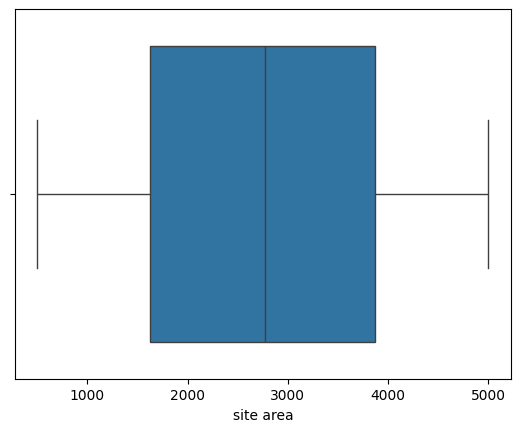

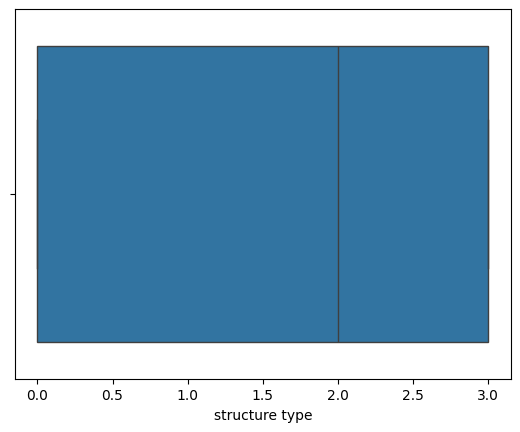

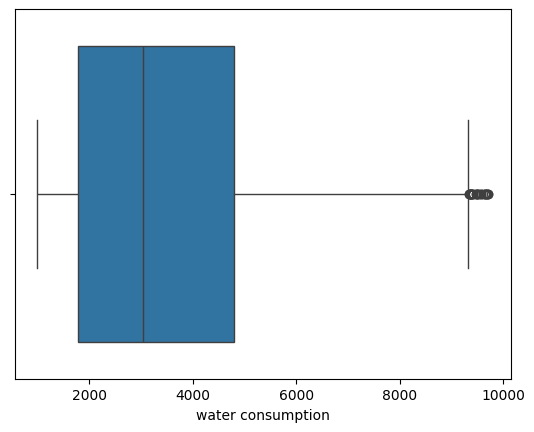

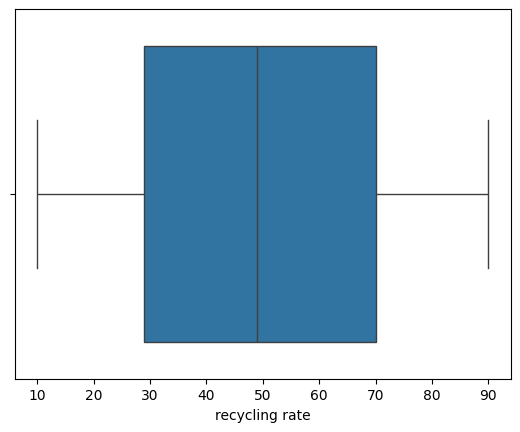

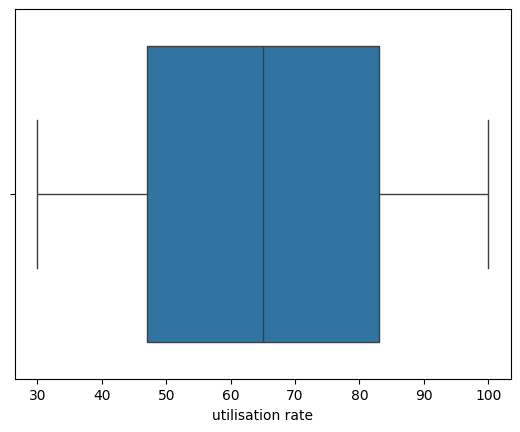

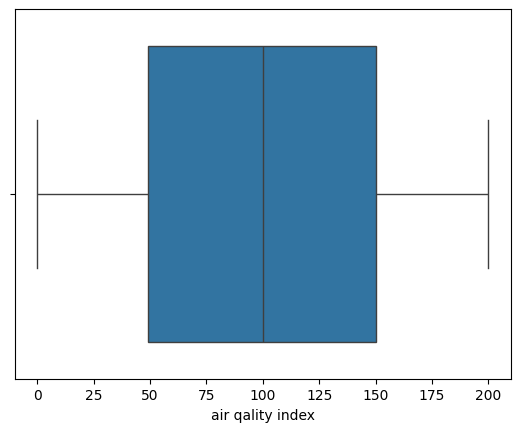

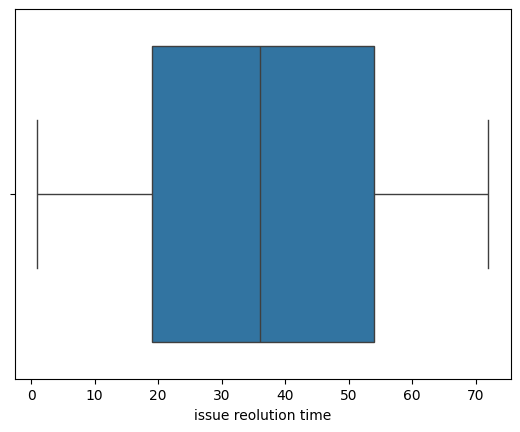

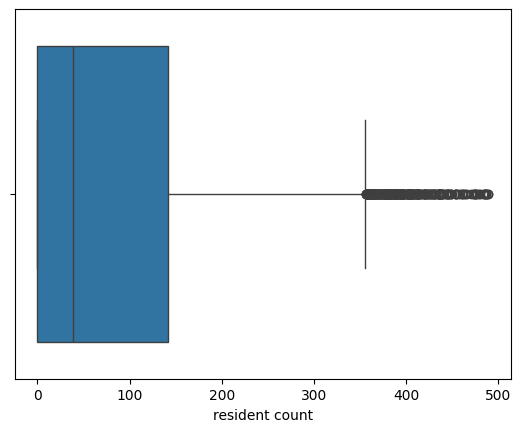

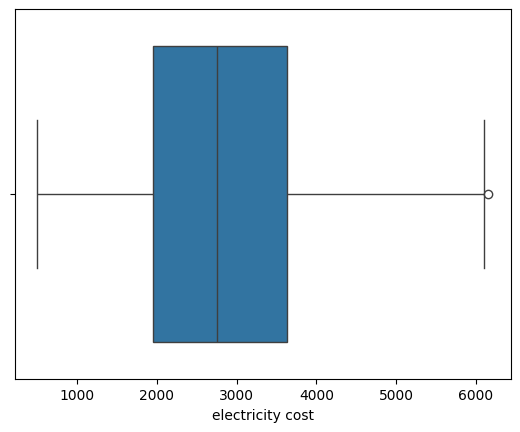

In [17]:
num = filtered_df.select_dtypes(include='number')
for column in num :
    plt.figure()
    sns.boxplot(x = filtered_df[column], data = filtered_df)

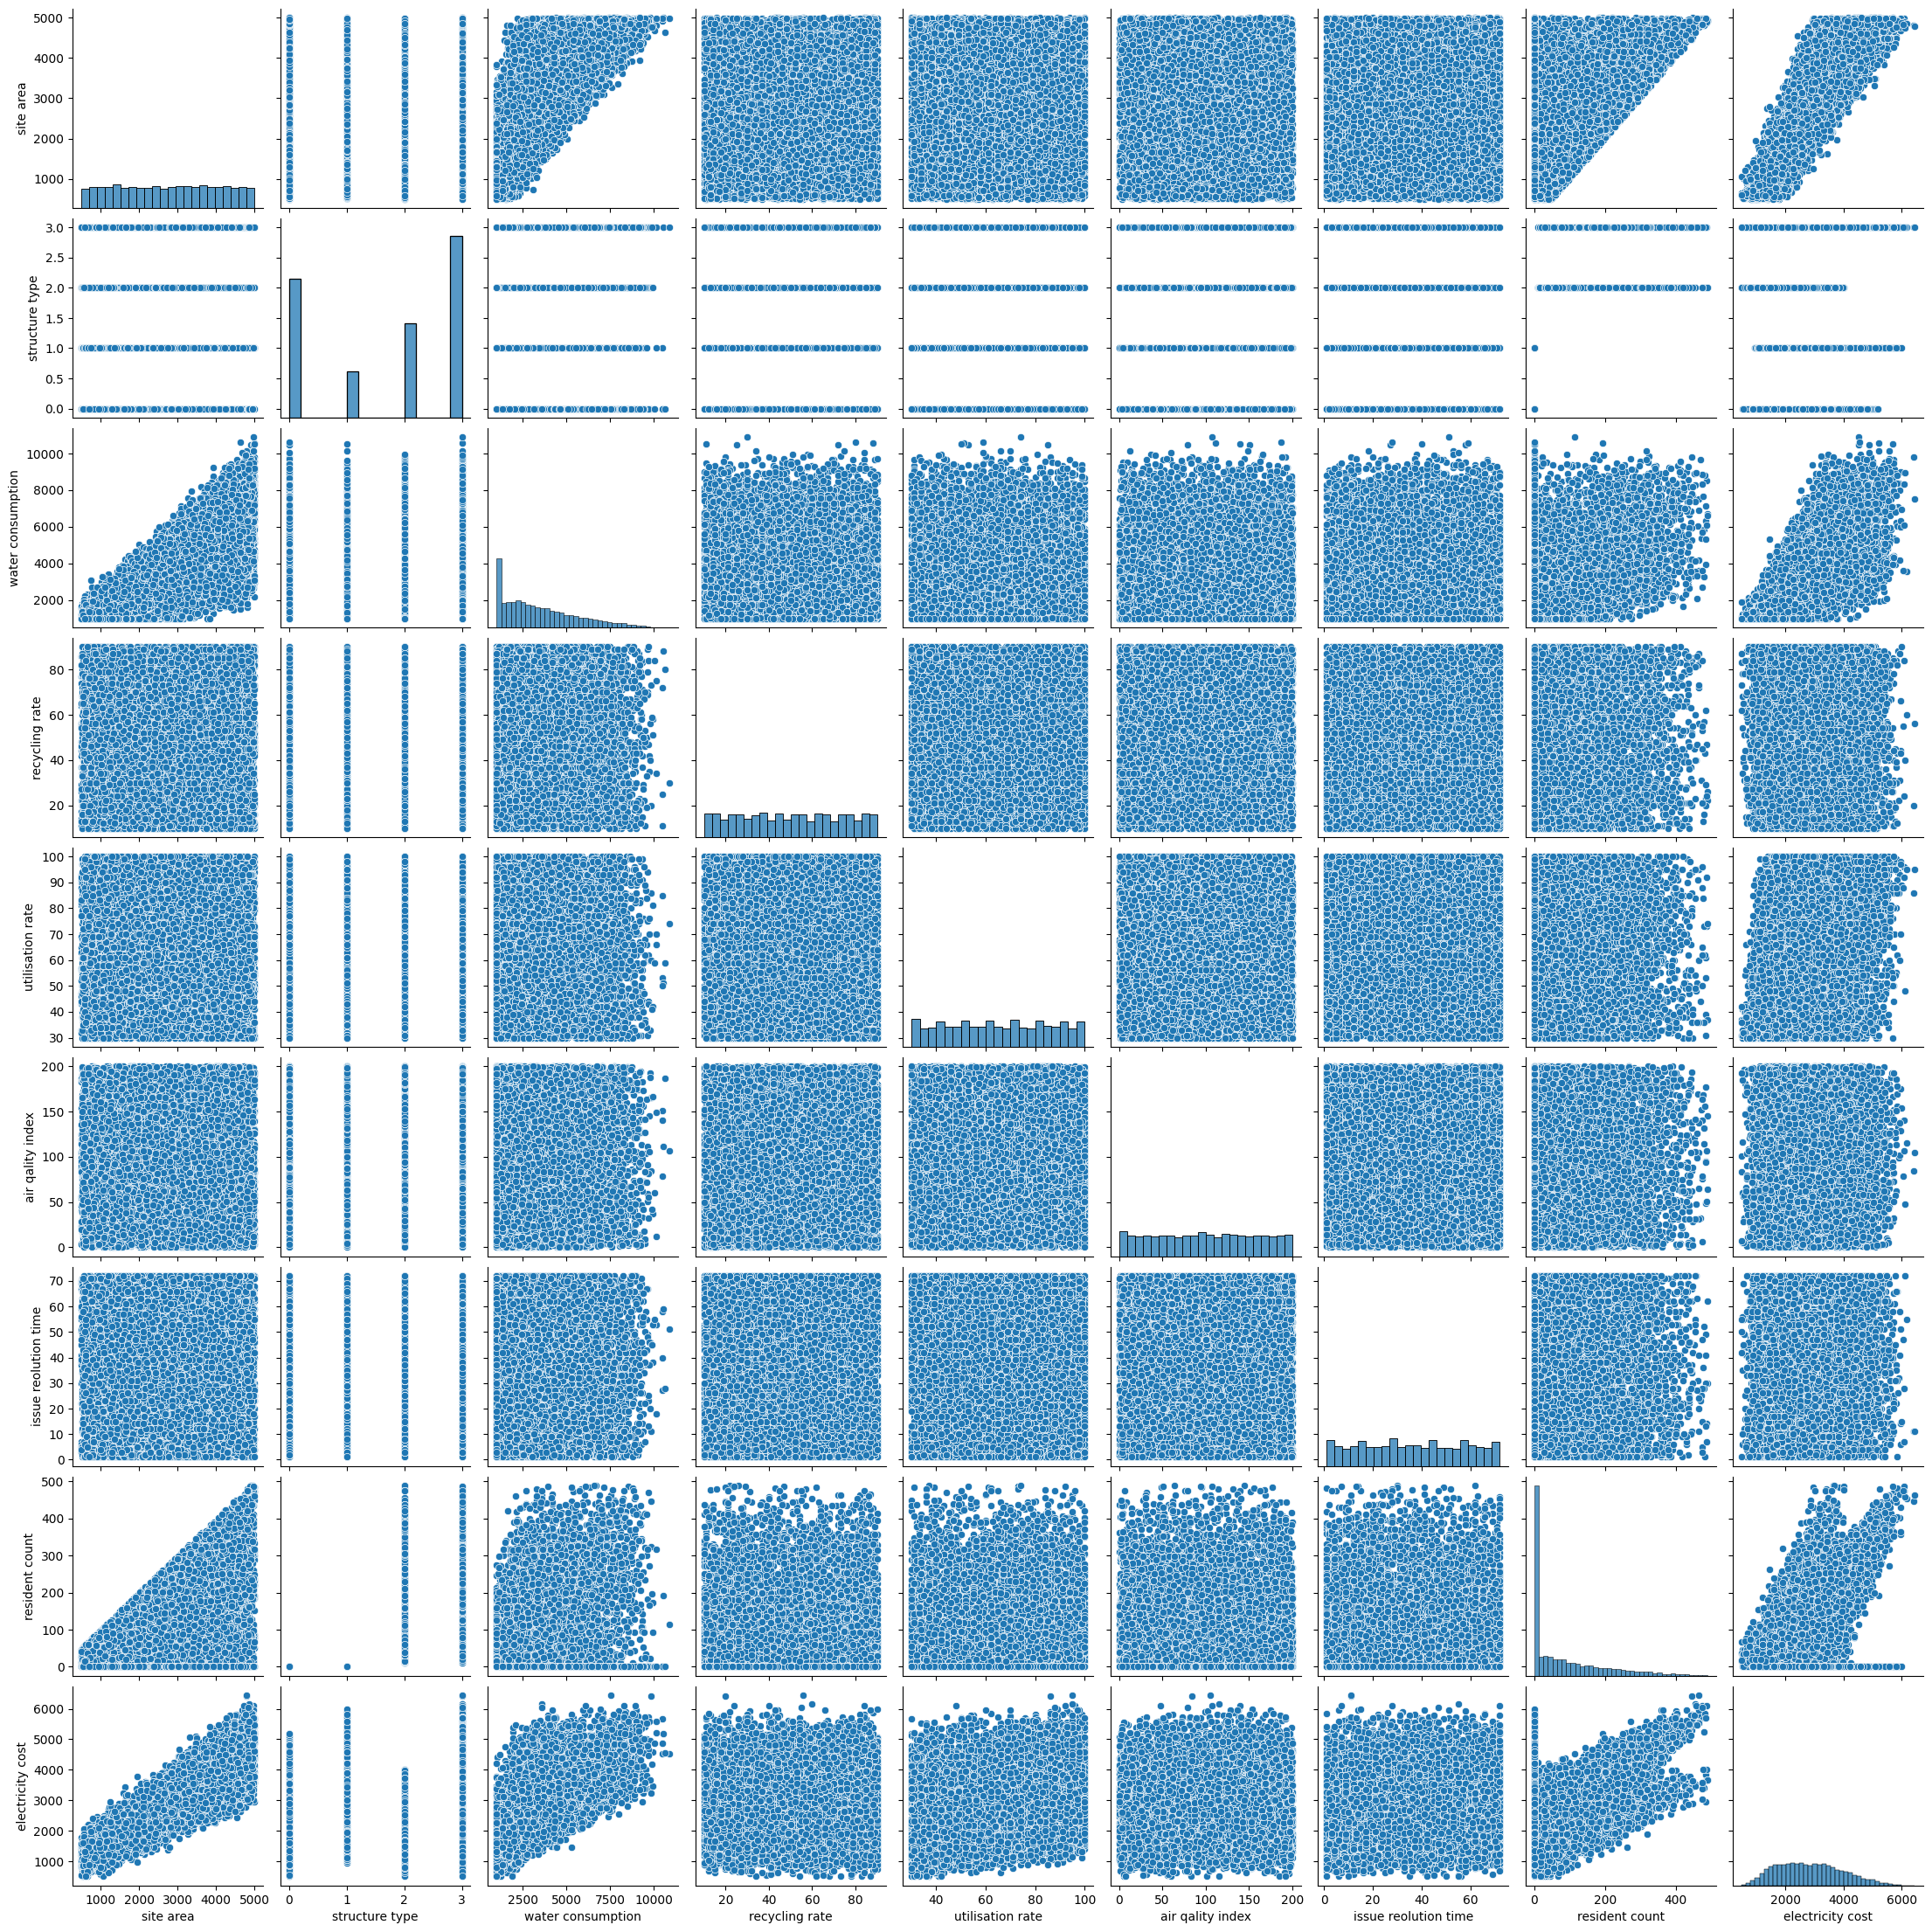

In [ ]:
res = df.select_dtypes(include=np.number)
sns.pairplot(data = res)

In [18]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [19]:
from sklearn.linear_model import LinearRegression
 
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_predict_lr_train = lr_model.predict(x_train)
y_predict_lr_test = lr_model.predict(x_test)
print(r2_score(y_train, y_predict_lr_train))
print("\n")
print(r2_score(y_test, y_predict_lr_test))

0.8098383551838331


0.8079715911487078


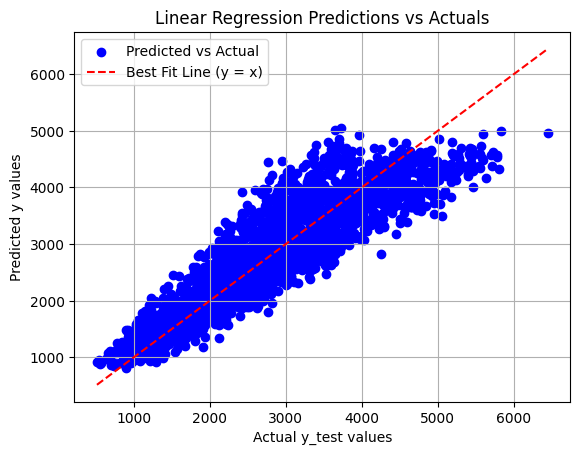

In [ ]:
import matplotlib.pyplot as plt
 
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_predict_lr_test, color='blue', label='Predicted vs Actual')
 
# Plot best fit line (which ideally should be y = x)
min_val = min(y_test.min(), y_predict_lr_test.min())
max_val = max(y_test.max(), y_predict_lr_test.max())
plt.plot([min_val, max_val] , [min_val, max_val], color='red', linestyle='--', label='Best Fit Line (y = x)')

plt.xlabel('Actual y_test values')
plt.ylabel('Predicted y values')
plt.title('Linear Regression Predictions vs Actuals')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# If the least square error shows high accuracy, it can be implied that the dataset is linear in nature, 
# else the dataset is non-linear

# Split your data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
 
# Train Linear Regression model
ols = LinearRegression()  
ols.fit(x_train_scaled, y_train)
 
# Predictions
y_pred = ols.predict(x_test_scaled)
y_pred_train = ols.predict(x_train_scaled)
 
# Evaluate
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
# print(f"RMSE: {rmse}")
r2 = r2_score(y_test, y_pred)
# r2_train = r2_score(y_train, y_pred_train)
# print(f"r2 score for training data: {r2_train}")
print(f"r2 Score for test data: {r2}") 

'''observation: 
Linear Regression : With 81.06% accuracy, it shows that despite its simplicity, 
many patterns in your data may follow a relatively linear trend.
''' 


r2 Score for test data: 0.8112223524907279


'observation: \nLinear Regression : With 81.06% accuracy, it shows that despite its simplicity, \nmany patterns in your data may follow a relatively linear trend.\n'

In [19]:
x_train_scaled

array([[ 1.65586727,  0.25140549,  2.26016181,  0.27634149,  0.01478417,
         0.96369266],
       [-0.47371779,  0.25140549, -0.90071184,  1.68417929, -1.01538591,
         0.24104737],
       [ 0.18189683,  0.25140549, -0.53898876,  0.61763551,  0.40722991,
         1.64927921],
       ...,
       [-1.24015142,  1.03920176, -1.13417455, -1.55811381, -0.52482873,
        -0.20365742],
       [-0.99371472, -1.32418706, -0.98429726,  0.87360601, -0.27955014,
        -0.78733247],
       [-0.49541662,  1.03920176, -0.9674841 , -1.47279031,  0.01478417,
         0.36148825]], shape=(8000, 6))

In [20]:
y_train

9254    3210.0
1561    1312.0
1670    2410.0
6087    3690.0
6669    3153.0
         ...  
5734    4177.0
5191    3550.0
5390    1512.0
860     1568.0
7270    2656.0
Name: electricity cost, Length: 8000, dtype: float64

In [30]:
y_pred

array([4581.55709266, 2111.96429201, 3150.69413271, ..., 1504.76225767,
       1816.31137398, 2315.16254525], shape=(8000,))

In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define Ridge model and alpha space
ridge = Ridge()
alpha_space = np.logspace(-5, 8, 15)
param_grid = {'alpha': alpha_space}

# Perform Grid Search with 5-fold CV
reg_cv = GridSearchCV(ridge, param_grid, cv=5)
reg_cv.fit(x_train, y_train)

# Make predictions
y_pred_train = reg_cv.predict(x_train)
y_pred_test = reg_cv.predict(x_test)

# Calculate R2 scores
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Best alpha selected by GridSearchCV: {reg_cv.best_params_['alpha']}")
print(f"R2 Score for training data: {r2_train}")
print(f"R2 Score for test data: {r2}")


Best alpha selected by GridSearchCV: 3.727593720314938
R2 Score for training data: 0.8088909840929611
R2 Score for test data: 0.8112138669794609


In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
 
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha =1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test) 
# Assuming y_test is your true values and y_pred is from your model
y_pred_train = ridge.predict(x_train)
 
# Step 4: Evaluate the model
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
 
# print(f"RMSE: {rmse}")
print(f"R2 Score for traing data: {r2_train}")
print(f"R2 Score for test data: {r2}")

R2 Score for traing data: 0.8088912103856541
R2 Score for test data: 0.8112201191634115


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Step 1: Split your dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and train the model
tree_regressor = DecisionTreeRegressor()  # You can tune max_depth
tree_regressor.fit(x_train, y_train)
 
# Step 3: Make predictions
y_pred = tree_regressor.predict(x_test)
y_pred_train = tree_regressor.predict(x_train)
 
# Step 4: Evaluate the model
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
 
# print(f"RMSE: {rmse}")
print(f"R2 Score for traing data: {r2_train}")
print(f"R2 Score for test data: {r2}")



'''observation:
Decision Tree struggles: The accuracy drop could mean it's overfitting or not generalizing well. 
It's often more sensitive to noise and lacks the averaging benefits of ensemble methods like Random Forest.
'''



R2 Score for traing data: 1.0
R2 Score for test data: 0.9156203528030566


"observation:\nDecision Tree struggles: The accuracy drop could mean it's overfitting or not generalizing well. \nIt's often more sensitive to noise and lacks the averaging benefits of ensemble methods like Random Forest.\n"

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Step 1: Split your dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and train the model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
 
# Step 3: Make predictions
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
 
# Step 4: Evaluate
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2_tain = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
 
# print(f"RMSE: {rmse}")
print(f"R2 Score for training data: {r2_train}")
print(f"R2 Score for test data: {r2}")
 
'''observation
Random Forest wins: This model slightly outperforms others, indicating that your dataset benefits from 
ensemble learning and captures non-linear relationships more effectively.
Data structure matters: If Random Forest performs best, it's likely that feature interactions
or non-linear dependencies are present. Your data may also benefit from techniques like feature 
importance analysis to understand what drives predictions most.'''


R2 Score for training data: 1.0
R2 Score for test data: 0.9582887686678451


"observation\nRandom Forest wins: This model slightly outperforms others, indicating that your dataset benefits from \nensemble learning and captures non-linear relationships more effectively.\nData structure matters: If Random Forest performs best, it's likely that feature interactions\nor non-linear dependencies are present. Your data may also benefit from techniques like feature \nimportance analysis to understand what drives predictions most."

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Step 1: Scale your features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
 
# Step 2: Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,  y, test_size=0.2, random_state=42)
 
# Step 3: Initialize and fit Elastic Net CV
elastic_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.5, 0.9],         # mix of L1 and L2
    alphas=[0.01, 0.1, 1.0, 10.0],    # regularization strength
    cv=5,
    random_state=42
)
elastic_cv.fit(x_train, y_train)
 
# Step 4: Predict and evaluate
y_pred = elastic_cv.predict(x_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
 
# Step 5: Print results
print(f"Elastic Net RMSE: {rmse}")
print(f"Elastic Net R² Score: {r2}")
print(f"Best Alpha: {elastic_cv.alpha_}")
print(f"Best L1 Ratio: {elastic_cv.l1_ratio_}")
 
 

Elastic Net RMSE: 485.98709258623006
Elastic Net R² Score: 0.8106735347844297
Best Alpha: 0.01
Best L1 Ratio: 0.9


In [28]:
num = df.select_dtypes(include="number")
# for num in df_new:
skew = num.skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = num.kurt()
print(kurt)


Skew

site area              -0.005722
water consumption       0.774431
recycling rate          0.022425
utilisation rate        0.004645
air qality index       -0.004155
issue reolution time    0.006188
resident count          1.313040
electricity cost        0.301033
dtype: float64

Kurt

site area              -1.202504
water consumption      -0.170075
recycling rate         -1.200475
utilisation rate       -1.193602
air qality index       -1.193428
issue reolution time   -1.174524
resident count          0.948397
electricity cost       -0.603106
dtype: float64


In [12]:
# from scipy.stats import zscore
# print('Before outlier removal : ',df.shape)
# z = np.abs(zscore(df, axis = 1))
# threshold = 3

# print(z)
# dataset = df[(z < threshold).all(axis=1)]
# print('After Z-Score approach : ',dataset.shape)

import pandas as pd
from scipy.stats import zscore

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path

# Choose the columns to apply z-score filtering
columns_to_check = ['electricity cost', 'water consumption']  # Use your actual column names

# Calculate z-score for those columns
z_scores = df[columns_to_check].apply(zscore)

# Apply threshold (e.g., abs(zscore) < 3)
threshold = 3
filtered_df = df[(z_scores.abs() < threshold).all(axis=1)]

print('After z-score filtering:', filtered_df.shape)
# print(df.shape)


After z-score filtering: (9982, 9)


In [18]:
# Define the columns you're working with
cn = ['electricity cost', 'water consumption']

# Calculate Q1 and Q3 for those columns only
Q1 = df[cn].quantile(0.10)
Q3 = df[cn].quantile(0.90)
IQR = Q3 - Q1

# Filter out outliers using the IQR method
df_filtered = df[~((df[cn] < (Q1 - 1.5 * IQR)) | (df[cn] > (Q3 + 1.5 * IQR))).any(axis=1)]

print('After IQR approach : ', df_filtered.shape)


After IQR approach :  (10000, 9)


In [19]:
# If the least square error shows high accuracy, it can be implied that the dataset is linear in nature, 
# else the dataset is non-linear

# Split your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
 
# Train Linear Regression model
ols = LinearRegression()
ols.fit(x_train_scaled, y_train)
 
# Predictions
y_pred = ols.predict(x_test_scaled)
 
# Evaluate
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
 
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 485.28219406103506
R² Score: 0.8112223524907279


### Ridge Regession

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
 
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha =1.0)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train) 
# Assuming y_test is your true values and y_pred is from your model
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

 
print(f"RMSE: {rmse}")
print(f"R² Score for test data: {r2}")
print(f"r2 Score for training data: {r2_train}")

RMSE: 485.2850646095058
R² Score for test data: 0.8112201191634115
r2 Score for training data: 0.8088912103856541


In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define Ridge model and alpha space
ridge = Ridge()
alpha_space = np.logspace(-5, 8, 15)
param_grid = {'alpha': alpha_space}

# Perform Grid Search with 5-fold CV
reg_cv = GridSearchCV(ridge, param_grid, cv=5)
reg_cv.fit(x_train, y_train)

# Make predictions
y_pred_train = reg_cv.predict(x_train)
y_pred_test = reg_cv.predict(x_test)

# Calculate R2 scores
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"Best alpha selected by GridSearchCV: {reg_cv.best_params_['alpha']}")
print(f"R2 Score for training data: {r2_train}")
print(f"R2 Score for test data: {r2}")


Best alpha selected by GridSearchCV: 3.727593720314938
R2 Score for training data: 0.8088909840929611
R2 Score for test data: 0.8112138669794609


In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define Ridge model
ridge = Ridge()

# Define parameter space
param_dist = {'alpha': np.logspace(-5, 8, 200)}

# Set up RandomizedSearchCV
ridge_random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='r2',  # Use 'neg_mean_squared_error' if preferred
    random_state=42
)

# Fit the model to training data
ridge_random_search.fit(x_train, y_train)

# Predict using the best estimator found
y_pred_train_rrs = ridge_random_search.predict(x_train)
y_pred_test_rrs = ridge_random_search.predict(x_test)

# Calculate R2 scores
r2_train = r2_score(y_train, y_pred_train_rrs)
r2_test = r2_score(y_test, y_pred_test_rrs)

# Display results
print(f"Best alpha selected by RandomizedSearchCV: {ridge_random_search.best_params_['alpha']}")
print(f"R2 Score for training data: {r2_train}")
print(f"R2 Score for test data: {r2_test}")

Best alpha selected by RandomizedSearchCV: 7.57525025877192
R2 Score for training data: 0.8088902239889854
R2 Score for test data: 0.811204650376328


### Decision Tree Regression 

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Step 1: Split your dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and train the model
tree_regressor = DecisionTreeRegressor()  # You can tune max_depth
tree_regressor.fit(x_train, y_train)
 
# Step 3: Make predictions
y_pred = tree_regressor.predict(x_test)
y_pred_train = tree_regressor.predict(x_train)
 
# Step 4: Evaluate the model
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
 
# print(f"RMSE: {rmse}")
print(f"R2 Score for traing data: {r2_train}")
print(f"R2 Score for test data: {r2}")



'''observation:
Decision Tree struggles: The accuracy drop could mean it's overfitting or not generalizing well. 
It's often more sensitive to noise and lacks the averaging benefits of ensemble methods like Random Forest.
'''



R2 Score for traing data: 1.0
R2 Score for test data: 0.9144598112900901


"observation:\nDecision Tree struggles: The accuracy drop could mean it's overfitting or not generalizing well. \nIt's often more sensitive to noise and lacks the averaging benefits of ensemble methods like Random Forest.\n"

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predict
y_predict_train = best_dt.predict(x_train)
y_predict_test = best_dt.predict(x_test)

# Scores
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)
print("R2 Score for traing data:",r2_train)
print("R2 Score for test data:", r2_test)
print("Best Parameters selected by GridSearchCV:", grid_search.best_params_)


R2 Score for traing data: 0.9710340490348933
R2 Score for test data: 0.9425263932771692
Best Parameters selected by GridSearchCV: {'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_dt_random = random_search.best_estimator_

# Predict
y_predict_train = best_dt_random.predict(x_train)
y_predict_test = best_dt_random.predict(x_test)

# Scores
r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)
print("R2 Score for traing data:",r2_train)
print("R2 Score for test data:", r2_test)
print("Best Parameters selected by RadomizedSearchCV:", random_search.best_params_)

R2 Score for traing data: 0.9709041204318211
R2 Score for test data: 0.9412962286457854
Best Parameters selected by RadomizedSearchCV: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 10, 'criterion': 'friedman_mse'}


### Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
 
# Step 1: Split your dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Step 2: Initialize and train the model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
 
# Step 3: Make predictions
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
 
# Step 4: Evaluate
# rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2_tain = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
 
# print(f"RMSE: {rmse}")
print(f"R2 Score for training data: {r2_train}")
print(f"R2 Score for test data: {r2}")
 
'''observation
Random Forest wins: This model slightly outperforms others, indicating that your dataset benefits from 
ensemble learning and captures non-linear relationships more effectively.
Data structure matters: If Random Forest performs best, it's likely that feature interactions
or non-linear dependencies are present. Your data may also benefit from techniques like feature 
importance analysis to understand what drives predictions most.'''


R2 Score for training data: 1.0
R2 Score for test data: 0.9575673353991112


"observation\nRandom Forest wins: This model slightly outperforms others, indicating that your dataset benefits from \nensemble learning and captures non-linear relationships more effectively.\nData structure matters: If Random Forest performs best, it's likely that feature interactions\nor non-linear dependencies are present. Your data may also benefit from techniques like feature \nimportance analysis to understand what drives predictions most."

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_predict_train = best_rf.predict(x_train)
y_predict_test = best_rf.predict(x_test)

# Scores
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)
print("R2 Score for traing data:",r2_train)
print("R2 Score for test data:", r2_test)
print("Best Parameters selected by GridSearchCV:", grid_search.best_params_)

# y_predict_dt_cv_train = dt_cv.predict(x_train)
# y_predict_dt_cv_test = dt_cv.predict(x_test)

# print(r2_score(y_train, y_predict_dt_cv_train))
# print("\n")
# print(r2_score(y_test, y_predict_dt_cv_test))

R2 Score for traing data: 0.9833615110673622
R2 Score for test data: 0.9586341119599258
Best Parameters selected by GridSearchCV: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,           # Try 30 random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

# Best model
best_rf_random = random_search.best_estimator_

# Predict
y_predict_train = best_rf_random.predict(x_train)
y_predict_test = best_rf_random.predict(x_test)

# Scores
r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)
print("R2 Score for traing data:",r2_train)
print("R2 Score for test data:", r2_test)
print("Best Parameters selected by RadomizedSearchCV:", random_search.best_params_)

Train R2: 0.9832805581610256
Test R2 : 0.9585322374078193
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'friedman_mse'}


In [27]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [28]:
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\baps\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [30]:
x

,site area,structure type,water consumption,recycling rate,utilisation rate,resident count
0,1360,2,2519.0,69,52,72
1,4272,2,2324.0,50,76,261
2,3592,2,2701.0,20,94,117
3,966,3,1000.0,13,60,35
4,4926,3,5990.0,23,65,185
...,...,...,...,...,...,...
9995,708,0,1365.0,76,77,0
9996,2960,3,3332.0,22,72,54
9997,3942,0,2427.0,61,43,0
9998,3211,0,4639.0,72,73,0


ValueError: x and y must be the same size

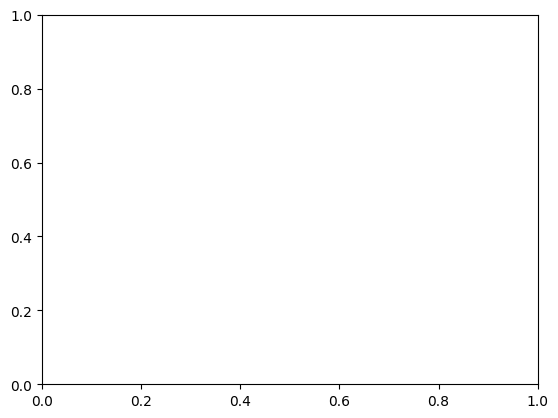

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color ="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [31]:
y

0       1420.0
1       3298.0
2       3115.0
3       1575.0
4       4301.0
         ...  
9995     885.0
9996    3081.0
9997    3325.0
9998    2892.0
9999    2603.0
Name: electricity cost, Length: 10000, dtype: float64

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
xg = XGBRegressor()
xg.fit(x_train, y_train)

y_pred_train = xg.predict(x_train)
y_pred = xg.predict(x_test)

r2 = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred, y_test)

print(r2)
print(r2_test)

0.9857699217387229
0.9532205460081541


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
 
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
 
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train) 

y_predict_train_cv = grid_search.predict(x_train)
y_predict_test_cv = grid_search.predict(x_test)
 
print("r2 score of training data: ",r2_score(y_train, y_predict_train_cv))
print("\n")
print("r2 score for test data: ",r2_score(y_test, y_predict_test_cv))

r2 score of training data:  0.9691812598261861


r2 score for test data:  0.9603834662881521


### AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Base learner
base_learner = DecisionTreeRegressor(max_depth=1)

# AdaBoost Regressor
adaboost = AdaBoostRegressor(estimator=base_learner, n_estimators=100, learning_rate=0.1)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
y_pred_train = adaboost.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred) 

print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)

r2 score for training data:  0.644359319358411
r2 score for test data 0.6593094502397103


In [16]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
    --------------------------------------- 1.6/102.5 MB 7.0 MB/s eta 0:00:15
   - -------------------------------------- 3.4/102.5 MB 7.2 MB/s eta 0:00:14
   -- ------------------------------------- 5.8/102.5 MB 8.6 MB/s eta 0:00:12
   --- ------------------------------------ 8.1/102.5 MB 9.3 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/102.5 MB 8.8 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/102.5 MB 8.8 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/102.5 MB 8.8 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/102.5 MB 8.8 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/102.5 MB 8.8 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/102.5 MB 8.8 MB/s eta 0:00:11


### CatBoost Regression

In [18]:
from catboost import CatBoostRegressor

# CatBoost Regressor
catboost = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', verbose=0)
catboost.fit(x_train, y_train)
y_pred = catboost.predict(x_test)
y_pred_train = catboost.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)


r2 score for training data:  0.9645452878135405
r2 score for test data 0.9642324396453523


In [19]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 541.6 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 541.6 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 599.2 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 599.2 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 592.2 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 592.2 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 592.2 kB/s eta 0:00:01
   ----------------------------

### Lightgbm 

In [20]:
import lightgbm as lgb

# LightGBM Regressor
lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)
y_pred_train = lgbm.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

print("r2 score for training data: ", r2_train)
print("r2 score for test data", r2)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 6
[LightGBM] [Info] Start training from score 2834.435067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 